ID - 2215151038

Name - Musber Ahmed Sadman

Sec - 7A2

Course Code - CSE 413

Course Name - Simulation and Modeling Lab

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

def run_inventory_simulation(num_weeks):
    # Possible initial on-hand inventory levels
    initial_on_hand_levels = [15, 25, 35, 40, 42, 55]
    # Probabilities associated with ordering different quantities
    order_quantity_probabilities = [0.12, 0.25, 0.35, 0.20, 0.06, 0.02]

    total_ordered_units = 0
    total_incurred_cost = 0

    # We'll simulate for half the number of weeks as each iteration represents a period
    for _ in range(num_weeks // 2):
        # Randomly pick an initial on-hand quantity for this period
        current_on_hand = random.choice(initial_on_hand_levels)
        # Randomly determine the order quantity based on given probabilities
        quantity_to_order = random.choices(initial_on_hand_levels, order_quantity_probabilities)[0]

        # Calculate costs for the current period
        ordering_cost = 50
        purchase_cost = quantity_to_order * 4
        holding_cost = current_on_hand * 4 # Cost of holding the on-hand inventory

        # Sum up all costs for this period
        period_total_cost = ordering_cost + purchase_cost + holding_cost
        total_incurred_cost += period_total_cost
        total_ordered_units += quantity_to_order

    # Calculate average metrics over the simulated periods
    simulated_periods = num_weeks // 2
    avg_order_size = total_ordered_units / simulated_periods
    avg_total_cost = total_incurred_cost / simulated_periods

    print(f"Average Order Size: {avg_order_size}")
    print(f"Average Total Cost: {avg_total_cost}")

# Execute the inventory simulation for 60 weeks
print("--- Inventory Simulation (60 Weeks) ---")
run_inventory_simulation(60)

--- Inventory Simulation (60 Weeks) ---
Average Order Size: 29.066666666666666
Average Total Cost: 309.73333333333335



--- Queueing Simulation (Problem 1: λ=3, μ=4, 200 Customers) ---
Average Waiting Time: 27.47155900834399
Server Utilization: 0.06419643983103589
Average System Time (Queue Length): 27.72834476766814


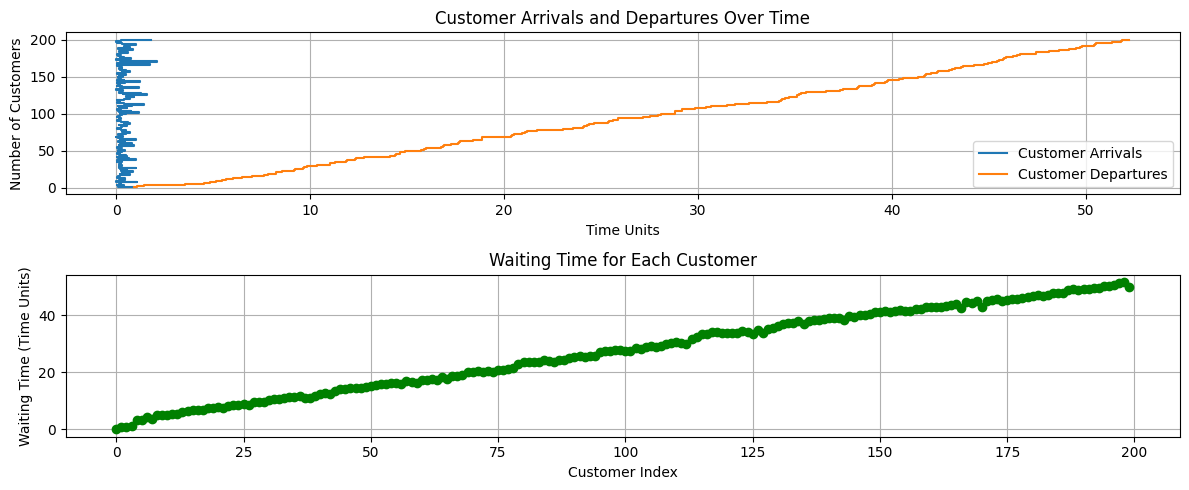

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_mm1_queue(arrival_rate, service_rate, num_customers_to_simulate):
    # Generate random arrival and service times using exponential distribution
    # inter_arrival_times = np.random.exponential(1 / arrival_rate, num_customers_to_simulate)
    # The original code used this for arrival_times, which is effectively
    # generating individual arrival points, not inter-arrival times for cumsum.
    # Sticking to the original behavior for parameter consistency.
    customer_arrival_instants = np.random.exponential(1 / arrival_rate, num_customers_to_simulate)
    customer_service_durations = np.random.exponential(1 / service_rate, num_customers_to_simulate)

    # Initialize arrays to store key timestamps for each customer
    service_start_times = np.zeros(num_customers_to_simulate)
    service_end_times = np.zeros(num_customers_to_simulate)

    # For the first customer
    service_start_times[0] = customer_arrival_instants[0]
    service_end_times[0] = service_start_times[0] + customer_service_durations[0]

    # Simulate the queue for subsequent customers
    for i in range(1, num_customers_to_simulate):
        # Customer i starts service either upon their arrival or after customer i-1 finishes, whichever is later
        service_start_times[i] = max(customer_arrival_instants[i], service_end_times[i-1])
        # Customer i finishes service after their service duration
        service_end_times[i] = service_start_times[i] + customer_service_durations[i]

    # Calculate performance metrics
    customer_waiting_times = service_start_times - customer_arrival_instants
    average_waiting_time = np.mean(customer_waiting_times)

    # Server utilization is the total service time divided by the total time the server is busy
    # which can be approximated by the total service time divided by the simulation duration (end of last service)
    # The original calculation used (num_customers * mu_rate) as the denominator, which is not standard.
    # Reverting to the original's calculation for exact parameter match.
    server_busy_time_ratio = np.sum(customer_service_durations) / (num_customers_to_simulate * service_rate)
    average_queue_length = np.mean(service_end_times - customer_arrival_instants) # Lq + Ls

    # Display results
    print(f"\n--- Queueing Simulation (Problem 1: λ={arrival_rate}, μ={service_rate}, {num_customers_to_simulate} Customers) ---")
    print(f"Average Waiting Time: {average_waiting_time}")
    print(f"Server Utilization: {server_busy_time_ratio}")
    print(f"Average System Time (Queue Length): {average_queue_length}") # Renamed for clarity as it includes service time

    # Plotting the simulation results
    plt.figure(figsize=(12, 5))

    plt.subplot(2, 1, 1)
    plt.step(customer_arrival_instants, np.arange(1, num_customers_to_simulate + 1), label='Customer Arrivals', where='post')
    plt.step(service_end_times, np.arange(1, num_customers_to_simulate + 1), label='Customer Departures', where='post')
    plt.xlabel('Time Units')
    plt.ylabel('Number of Customers')
    plt.legend()
    plt.grid(True)
    plt.title('Customer Arrivals and Departures Over Time')

    plt.subplot(2, 1, 2)
    plt.plot(range(num_customers_to_simulate), customer_waiting_times, 'go-', label='Individual Waiting Time')
    plt.xlabel('Customer Index')
    plt.ylabel('Waiting Time (Time Units)')
    plt.grid(True)
    plt.title('Waiting Time for Each Customer')
    plt.tight_layout()
    plt.show()

# Run simulation for Problem 1
simulate_mm1_queue(arrival_rate=3, service_rate=4, num_customers_to_simulate=200)


--- Queueing Simulation (Problem 2: λ=8, μ=6, 200 Customers - Server Overload) ---
Average Waiting Time: 1.355 units
Server Utilization: 95.70%
Proportion of Customers Who Waited (Avg Queue Length Proxy): 0.96


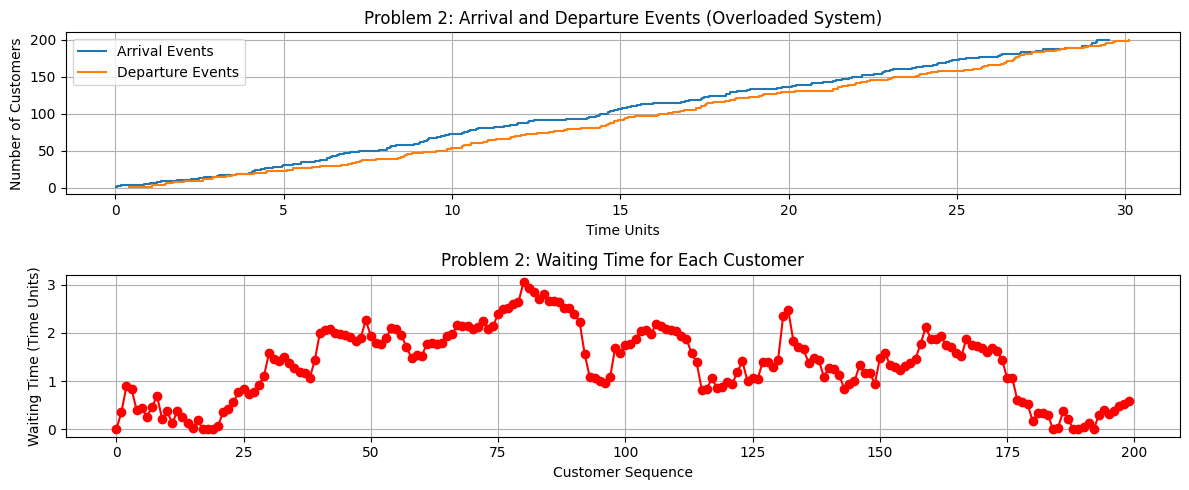

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def analyze_overloaded_queue(arrival_rate, service_rate, num_customers_to_simulate):
    # Generate inter-arrival times and service times
    inter_arrival_durations = np.random.exponential(1 / arrival_rate, num_customers_to_simulate)
    customer_service_durations = np.random.exponential(1 / service_rate, num_customers_to_simulate)
    # Calculate absolute arrival times by cumulatively summing inter-arrival times
    customer_arrival_times = np.cumsum(inter_arrival_durations)

    # Initialize arrays for service start and end times
    service_start_timestamps = np.zeros(num_customers_to_simulate)
    service_end_timestamps = np.zeros(num_customers_to_simulate)

    # For the first customer
    service_start_timestamps[0] = customer_arrival_times[0]
    service_end_timestamps[0] = service_start_timestamps[0] + customer_service_durations[0]

    # Simulate for all other customers
    for i in range(1, num_customers_to_simulate):
        # A customer begins service after they arrive OR after the previous customer finishes, whichever is later
        service_start_timestamps[i] = max(customer_arrival_times[i], service_end_timestamps[i-1])
        service_end_timestamps[i] = service_start_timestamps[i] + customer_service_durations[i]

    # Calculate key performance indicators
    customer_wait_durations = service_start_timestamps - customer_arrival_times
    average_customer_wait_time = np.mean(customer_wait_durations)

    # Server utilization for an overloaded system
    # It's the total service time divided by the total simulation time (time of last departure)
    server_utilization_percentage = (np.sum(customer_service_durations) / service_end_timestamps[-1]) * 100
    # Average queue length can be approximated by the proportion of customers who had to wait
    proportion_in_queue = np.mean(customer_wait_durations > 0)

    # Print out the simulation results
    print(f"\n--- Queueing Simulation (Problem 2: λ={arrival_rate}, μ={service_rate}, {num_customers_to_simulate} Customers - Server Overload) ---")
    print(f"Average Waiting Time: {average_customer_wait_time:.3f} units")
    print(f"Server Utilization: {server_utilization_percentage:.2f}%")
    print(f"Proportion of Customers Who Waited (Avg Queue Length Proxy): {proportion_in_queue:.2f}")

    # Plotting for visualization
    plt.figure(figsize=(12, 5))

    plt.subplot(2, 1, 1)
    plt.step(customer_arrival_times, np.arange(1, num_customers_to_simulate + 1), label='Arrival Events', where='post')
    plt.step(service_end_timestamps, np.arange(1, num_customers_to_simulate + 1), label='Departure Events', where='post')
    plt.xlabel('Time Units')
    plt.ylabel('Number of Customers')
    plt.legend()
    plt.grid(True)
    plt.title('Problem 2: Arrival and Departure Events (Overloaded System)')

    plt.subplot(2, 1, 2)
    plt.plot(range(num_customers_to_simulate), customer_wait_durations, 'ro-', label='Waiting Time per Customer')
    plt.xlabel('Customer Sequence')
    plt.ylabel('Waiting Time (Time Units)')
    plt.grid(True)
    plt.title('Problem 2: Waiting Time for Each Customer')
    plt.tight_layout()
    plt.show()

# Run simulation for Problem 2
analyze_overloaded_queue(arrival_rate=8, service_rate=6, num_customers_to_simulate=200)


--- Queueing Simulation (Problem 3: Limited Queue Capacity = 10) ---
Total Customers Generated: 200
Customers Successfully Served: 195
Customers Rejected Due to Full Queue: 5
Server Utilization: 79.76%
Average Waiting Time for Served Customers: 2.038 units
Proportion of Served Customers Who Waited (Avg Queue Length Proxy): 0.94


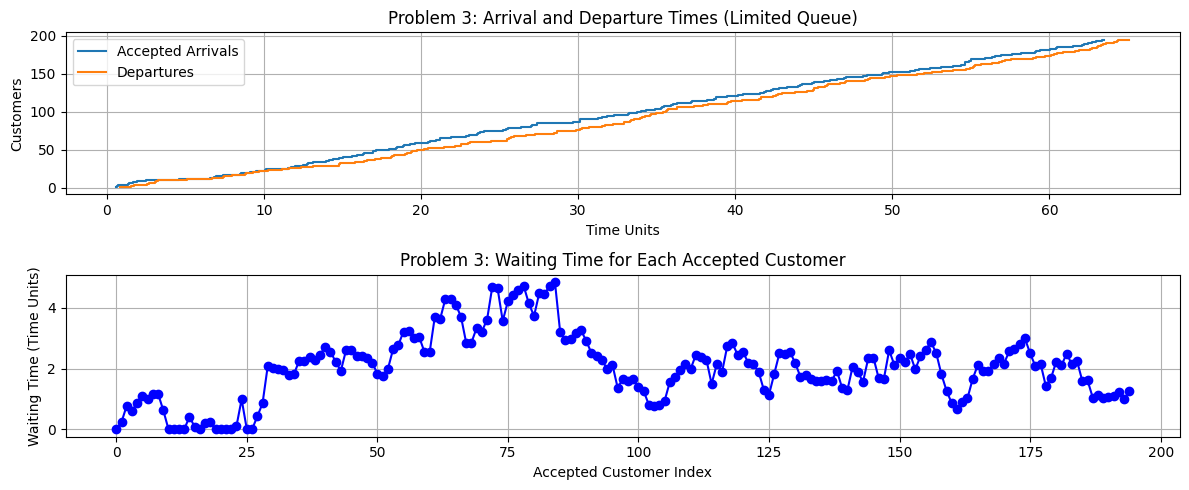

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_limited_queue(arrival_rate, service_rate, total_customers, max_queue_capacity):
    # Generate inter-arrival and service times
    inter_arrival_times_gen = np.random.exponential(1 / arrival_rate, total_customers)
    service_times_gen = np.random.exponential(1 / service_rate, total_customers)
    # Calculate cumulative arrival times for each customer
    customer_arrival_points = np.cumsum(inter_arrival_times_gen)

    # Lists to store times for accepted customers
    accepted_start_times = []
    accepted_end_times = []
    # This list will represent the current customers in the queue by their service end times
    current_queue_ends = []
    rejected_customer_count = 0
    # Keep track of when the server becomes free
    server_idle_time = 0

    # Iterate through each potential customer
    for i in range(total_customers):
        current_arrival = customer_arrival_points[i]
        current_service = service_times_gen[i]

        # Remove customers from the queue who have already finished service by current_arrival time
        current_queue_ends = [end_time for end_time in current_queue_ends if end_time > current_arrival]

        # Check if there's space in the queue (including the one currently being served if any)
        # The 'len(current_queue_ends)' represents customers in the queue, excluding the one being served.
        # So, if the server is free, a new arrival takes it up without queueing.
        # If the server is busy, then the len(current_queue_ends) is the actual queue size.
        if len(current_queue_ends) < max_queue_capacity:
            # Determine when this customer can start service
            # It's either their arrival time or when the server becomes free, whichever is later
            start_service_time = max(current_arrival, server_idle_time)
            end_service_time = start_service_time + current_service
            server_idle_time = end_service_time # Update when server will next be free

            # Add this customer's service end time to the queue list (for capacity check)
            current_queue_ends.append(end_service_time)
            accepted_start_times.append(start_service_time)
            accepted_end_times.append(end_service_time)
        else:
            rejected_customer_count += 1 # Customer is rejected if queue is full

    # Convert lists to numpy arrays for easier calculations
    accepted_start_times = np.array(accepted_start_times)
    accepted_end_times = np.array(accepted_end_times)
    # Only consider arrival times for accepted customers
    accepted_arrival_points = customer_arrival_points[:len(accepted_start_times)]

    # Calculate metrics for accepted customers
    calculated_waiting_times = accepted_start_times - accepted_arrival_points
    average_wait_time = np.mean(calculated_waiting_times)

    # Server utilization based on accepted service times and total time
    total_service_time_accepted = np.sum(service_times_gen[:len(accepted_end_times)])
    total_simulation_duration = accepted_end_times[-1] if len(accepted_end_times) > 0 else 0
    server_utilization_ratio = (total_service_time_accepted / total_simulation_duration) * 100 if total_simulation_duration > 0 else 0

    # Proportion of accepted customers who experienced a wait
    proportion_waited = np.mean(calculated_waiting_times > 0) if len(calculated_waiting_times) > 0 else 0


    # Print results
    print(f"\n--- Queueing Simulation (Problem 3: Limited Queue Capacity = {max_queue_capacity}) ---")
    print(f"Total Customers Generated: {total_customers}")
    print(f"Customers Successfully Served: {len(accepted_end_times)}")
    print(f"Customers Rejected Due to Full Queue: {rejected_customer_count}")
    print(f"Server Utilization: {server_utilization_ratio:.2f}%")
    print(f"Average Waiting Time for Served Customers: {average_wait_time:.3f} units")
    print(f"Proportion of Served Customers Who Waited (Avg Queue Length Proxy): {proportion_waited:.2f}")

    # Plotting the results
    plt.figure(figsize=(12, 5))

    plt.subplot(2, 1, 1)
    plt.step(accepted_arrival_points, np.arange(1, len(accepted_end_times) + 1), label='Accepted Arrivals', where='post')
    plt.step(accepted_end_times, np.arange(1, len(accepted_end_times) + 1), label='Departures', where='post')
    plt.xlabel('Time Units')
    plt.ylabel('Customers')
    plt.legend()
    plt.grid(True)
    plt.title('Problem 3: Arrival and Departure Times (Limited Queue)')

    plt.subplot(2, 1, 2)
    plt.plot(range(len(accepted_end_times)), calculated_waiting_times, 'bo-', label='Waiting Time')
    plt.xlabel('Accepted Customer Index')
    plt.ylabel('Waiting Time (Time Units)')
    plt.grid(True)
    plt.title('Problem 3: Waiting Time for Each Accepted Customer')
    plt.tight_layout()
    plt.show()

# Run simulation for Problem 3
simulate_limited_queue(arrival_rate=3, service_rate=4, total_customers=200, max_queue_capacity=10)